In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data_stunting_1.csv')
data

,Provinsi,Persentase Keluarga Terkena Khasus Stunting,Keluhan Kesehatan,Balita Stunting,Balita Wasting,Balita Underweight,Balita Overweight,Indeks Khusus Penanganan Stunting,Jumlah Murid TK
0,Aceh,62.20,68.78,33.2,10.7,23.8,2.0,61.95,95644
1,Sumatera Utara,62.31,71.70,25.8,7.9,16.5,2.9,58.56,108145
2,Sumatera Barat,67.55,55.09,23.3,7.4,18.1,1.9,63.97,81172
3,Riau,62.57,80.27,22.3,9.2,19.3,3.6,60.04,80164
4,Jambi,60.23,74.06,22.4,9.1,16.7,3.3,61.03,47324
...,...,...,...,...,...,...,...,...,...
29,Sulawesi Barat,71.30,72.98,33.8,7.1,23.1,1.9,66.03,23063
30,Maluku,67.83,68.40,28.7,12.0,26.4,1.6,50.91,20652
31,Maluku Utara,65.86,66.58,27.5,10.6,22.4,1.4,53.42,20207
32,Papua Barat,73.79,64.05,26.2,10.8,19.9,2.7,56.45,11223


In [11]:
data = data.drop(columns=["Jumlah Murid TK"])
data = data.drop(columns=["Balita Overweight"])

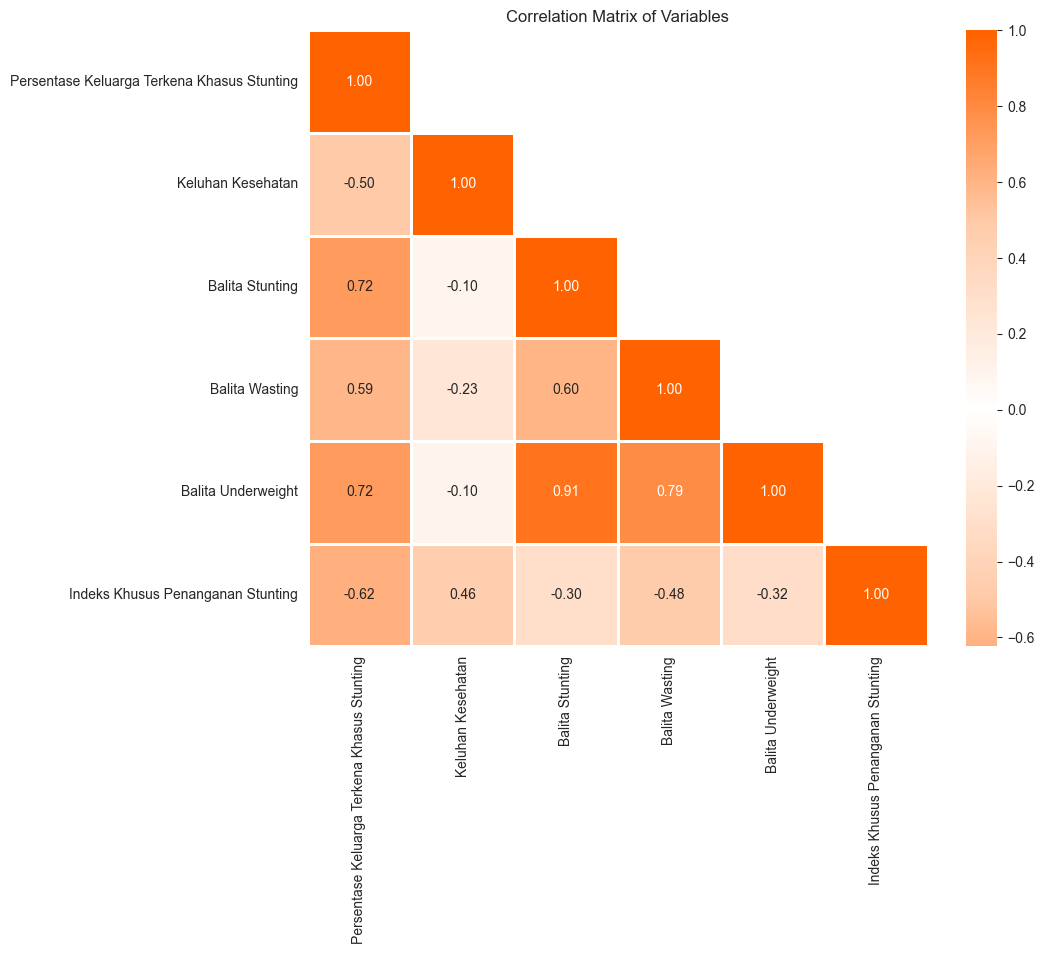

In [12]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Drop kolom 'Provinsi' pada variabel data
korelasi = data.drop(columns=["Provinsi"])

sns.set_style('whitegrid')

colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
correlation_matrix = korelasi.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask, k=1)] = True
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Visualisasikan korelasi matriks menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix of Variables')
plt.show()

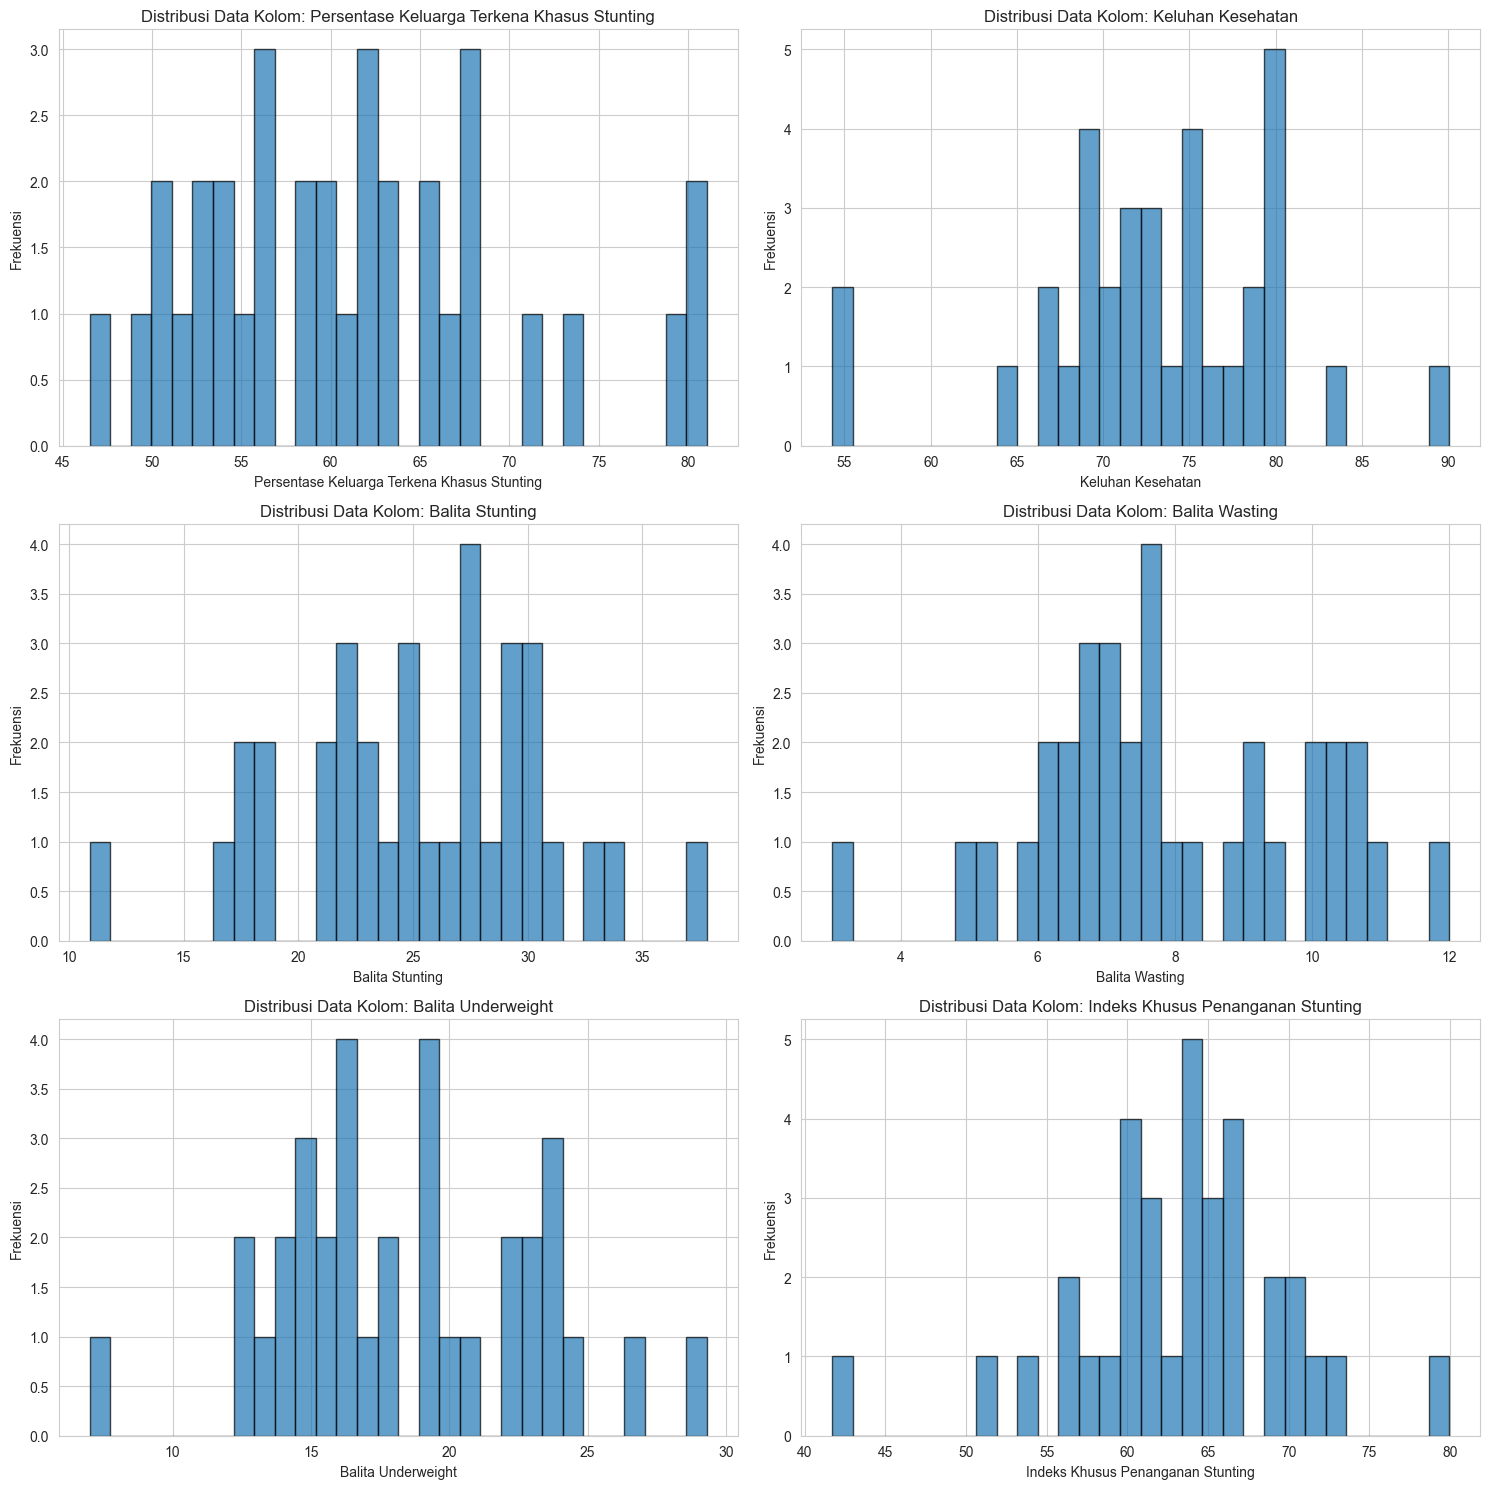

In [13]:
# Buat histogram untuk distribusi data setiap kolom
num_columns = len(korelasi.columns)
fig, axes = plt.subplots(nrows=num_columns//2 + num_columns%2, ncols=2, figsize=(15, 5*num_columns//2))

for i, column in enumerate(korelasi.columns):
    ax = axes[i//2, i%2]
    ax.hist(korelasi[column], bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribusi Data Kolom: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frekuensi')
    ax.grid(True)

plt.tight_layout()
plt.show()

Silhouette Score: 0.2517507146805462


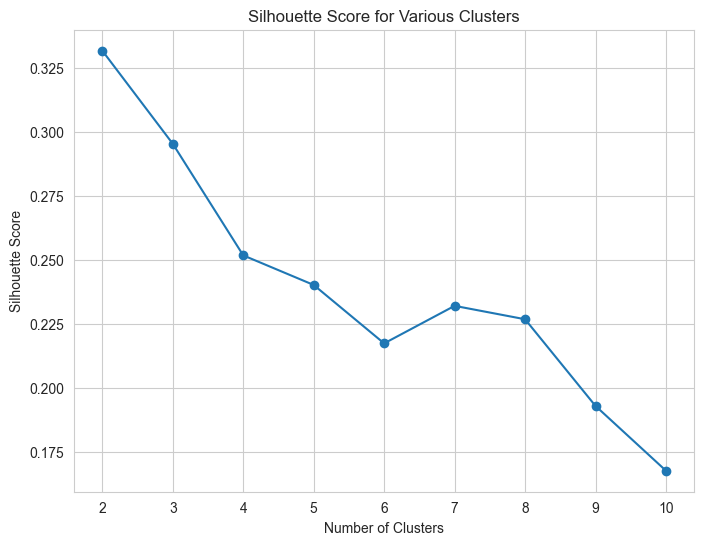

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tentukan jumlah cluster optimal menggunakan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(korelasi)
    wcss.append(kmeans.inertia_)

# Dari plot elbow, kita asumsikan jumlah cluster optimal adalah 4
optimal_clusters = 4

# Terapkan KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(korelasi)

# Hitung silhouette score
silhouette_avg = silhouette_score(korelasi, kmeans_clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Visualisasikan silhouette score untuk berbagai jumlah cluster
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_clusters = kmeans.fit_predict(korelasi)
    silhouette_avg = silhouette_score(korelasi, kmeans_clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Clusters')
plt.show()